In [1]:
%matplotlib widget
import warnings
import inspect
import matplotlib.pyplot as plt
import numpy as np
from cued_sf2_lab.familiarisation import load_mat_img, plot_image
from my_dwt_scheme import opt_encode_dwt, decode_dwt
from typing import Tuple


In [2]:
# Lighthosue
Xl, _ = load_mat_img(img='lighthouse.mat', img_info='X', cmap_info={'map', 'map2'})
Xl = Xl - 128.0

# Bridge
Xb, _ = load_mat_img(img='bridge.mat', img_info='X', cmap_info={'map'})
Xb = Xb - 128.0

# Flamingo
Xf, _ = load_mat_img(img='flamingo.mat', img_info='X')
Xf = Xf - 128.0

In [3]:
# Define compression parameters
initial_qstep = 10  # Initial quantization step size
compression_level = 3  # Adjust compression level as needed
qstep = None  # Set to None for automatic optimisation
size_limit = 40960  # Set the desired size limit for optimisation

# Perform compression
vlc, hufftab, optimal_qstep = opt_encode_dwt(Xl, compression_level, size_lim=size_limit, rise_ratio=None)


In [4]:
# Perform decompression
from scipy.ndimage import gaussian_filter
decompressed_image = decode_dwt(vlc, compression_level, qstep=optimal_qstep, hufftab=hufftab)
decompressed_image = gaussian_filter(decompressed_image, 0.2)

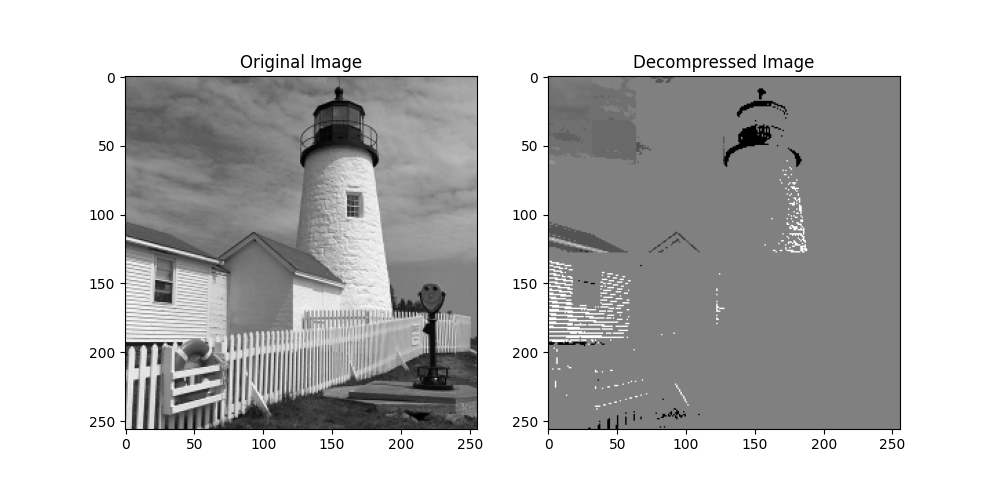

In [5]:
# Display original and decompressed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(Xl, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(decompressed_image, cmap="gray")
plt.title("Decompressed Image")

plt.show()